<a href="https://colab.research.google.com/github/jumayev004/practice/blob/main/ML_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Шаг 1: Загрузка датасета
dataset = fetch_openml(data_id="31", as_frame=True)
print(dataset.DESCR)

# Определяем целевую переменную и признаки
X = dataset.data
y = dataset.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. Perso

In [11]:
import pandas as pd

# Создайте DataFrame для анализа данных
data = pd.DataFrame(X)

# Вывод числа строк и столбцов в данных
num_rows, num_columns = data.shape
print(f"Число строк (объектов): {num_rows}")
print(f"Число столбцов (признаков): {num_columns}")

# Вывод статистики по признакам
data_description = data.describe()
print(data_description)

Число строк (объектов): 1000
Число столбцов (признаков): 20
          duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.00000

In [12]:
# 3
# Вывод типов данных каждого признака
data_types = data.dtypes
print("Типы данных признаков:")
print(data_types)

# Проверка и удаление нечисловых колонок
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
if not non_numeric_columns.empty:
    data = data.drop(columns=non_numeric_columns)
    print("Удалены нечисловые колонки.")

# Тип данных целевой переменной
y_data_type = y.dtypes
print(f"Тип данных целевой переменной: {y_data_type}")

Типы данных признаков:
checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
dtype: object
Удалены нечисловые колонки.
Тип данных целевой переменной: category


In [13]:
# 4 Проверка наличия пропущенных значений в данных
missing_data = data.isnull().sum()
missing_target = y.isnull().sum()

if missing_data.sum() == 0 and missing_target == 0:
    print("Пропущенных значений в данных и целевой переменной нет.")
else:
    print("Пропущенные значения в данных или целевой переменной обнаружены.")

    # Заполнение пропущенных значений медианными значениями
    data = data.fillna(data.median())
    y = y.fillna(y.median())
    print("Пропущенные значения заполнены медианными значениями.")

# Проверка наличия пропущенных значений после заполнения
missing_data = data.isnull().sum()
missing_target = y.isnull().sum()

if missing_data.sum() == 0 and missing_target == 0:
    print("Больше пропущенных значений нет.")
else:
    print("Пропущенные значения не были полностью заполнены.")

Пропущенных значений в данных и целевой переменной нет.
Больше пропущенных значений нет.


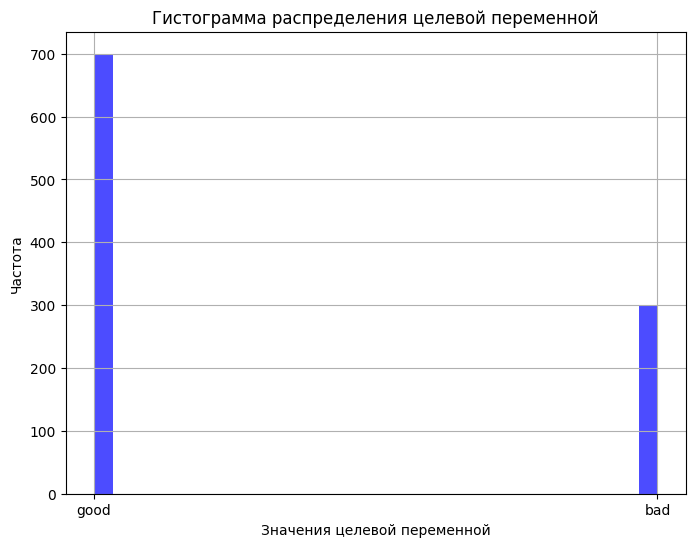

In [14]:
# 5
import matplotlib.pyplot as plt

# Построение гистограммы целевой переменной
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, color='blue', alpha=0.7)
plt.title("Гистограмма распределения целевой переменной")
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.grid(True)
plt.show()


Уравнение гиперплоскости: y = 1.69 * x + 1.18


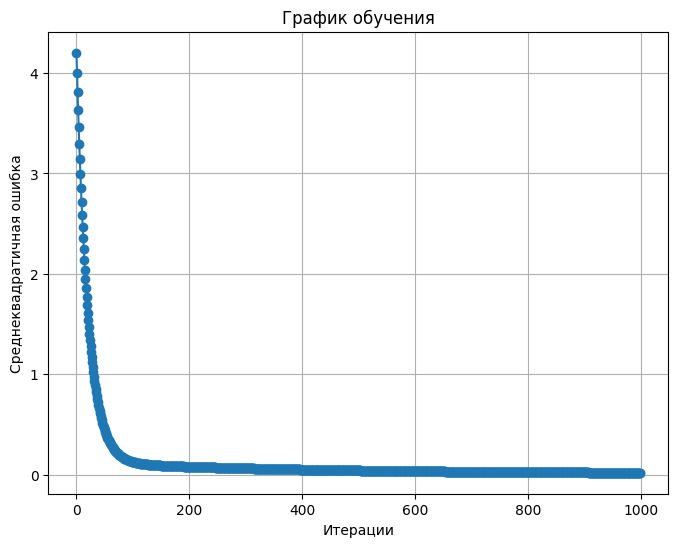

In [15]:
# 6
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных данных для примера
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

# Функция для вычисления среднеквадратичной ошибки (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Инициализация параметров модели
num_samples, num_features = X.shape
weights = np.zeros((num_features, 1))
bias = 0

# Гиперпараметры модели
learning_rate = 0.01
num_iterations = 1000

# Обучение модели линейной регрессии
loss_history = []

for i in range(num_iterations):
    y_pred = np.dot(X, weights) + bias
    dw = -(2 / num_samples) * np.dot(X.T, (y - y_pred))
    db = -(2 / num_samples) * np.sum(y - y_pred)
    weights -= learning_rate * dw
    bias -= learning_rate * db
    loss = mean_squared_error(y, y_pred)
    loss_history.append(loss)

# Получение уравнения гиперплоскости
equation = f'y = {weights[0, 0]:.2f} * x + {bias:.2f}'

print(f"Уравнение гиперплоскости: {equation}")

# Построение графика обучения
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), loss_history, marker='o', linestyle='-')
plt.title('График обучения')
plt.xlabel('Итерации')
plt.ylabel('Среднеквадратичная ошибка')
plt.grid(True)
plt.show()


In [16]:
#7
from sklearn.linear_model import LinearRegression

# Создайте и обучите модель линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Получите коэффициенты и смещение модели
coefficients = model.coef_
intercept = model.intercept_

# Выведите уравнение гиперплоскости
equation_sklearn = f'y = {coefficients[0, 0]:.2f} * x + {intercept[0]:.2f}'

print(f"Уравнение гиперплоскости (sklearn): {equation_sklearn}")


Уравнение гиперплоскости (sklearn): y = 1.99 * x + 1.02


In [25]:
# 8
from sklearn.metrics import r2_score, mean_squared_error

# предсказания с помощью обученной модели
y_pred_sklearn_model = model.predict(X)

# метрики для сравнения
r2_sklearn_model = r2_score(y, y_pred_sklearn_model)
mse_sklearn_model = mean_squared_error(y, y_pred_sklearn_model)

print(f"Модель (sklearn):")
print(f"Коэффициент детерминации (R^2): {r2_sklearn_model}")
print(f"Среднеквадратичная ошибка (MSE): {mse_sklearn_model}")

Модель (sklearn):
Коэффициент детерминации (R^2): 0.9708365512617749
Среднеквадратичная ошибка (MSE): 0.009924386487246495
